<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/Ayudantia_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ayudantía 6 - ICH3424 Ingeniería de Costas

## Análisis Armónico de Mareas 

### Modelo de componentes Astronómicas

Se debe ajustar un modelo de componentes astronómicas a la serie de datos observados de superficie libre (desnivelación instantánea):

$$\sum_{i=1}^{n}a_{i}\cos(2\pi f_{i}t + \phi_{i}) = \eta(t)$$

Donde:
\begin{array}{lll}
a_{i} &:& \text{amplitud de la componente i-ésima.} \\
f_{i} &:& \text{frecuencia de la componente i-ésima.} \\
\phi_{i} &:& \text{desfase de la componente i-ésima.} \\
t &:& \text{instante de tiempo en el que se calcula la marea.} \\
n &:& \text{Número de componentes consideradas.}
\end{array}

En este problema:

* Las frecuencias son conocidas, mientras que las amplitudes , y desfases no se conocen, y se hallan mediante un ajuste de mínimos cuadrados.
* Los residuos (información no explicada) pueden ser analizados utilizando analisis espectral, complementando con información meteorológica.

### Análisis armónico con T_Tide

Para el análisis armómico de mareas vamos a utilizar el paquete [T_TIDE](https://github.com/moflaher/ttide_py.git). En esta pagina se puede ver un ejemplo aplicado a una serie de tiempo real [link](https://ocefpaf.github.io/python4oceanographers/blog/2015/01/19/ttide_py/)

Descargamos el repositorio y lo instalamos en nuestra máquina remota (Google Colab):

In [ ]:
GIT_PATH = 'https://github.com/moflaher/ttide_py.git'
!git clone '{GIT_PATH}'
%cd ttide_py/
##!mv ./ttide_py/
##!rm -rf ./temp
##!ls
!python setup.py install

Cloning into 'ttide_py'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 547 (delta 11), reused 7 (delta 2), pack-reused 525
Receiving objects: 100% (547/547), 286.04 KiB | 650.00 KiB/s, done.
Resolving deltas: 100% (343/343), done.
/content/ttide_py
/usr/local/lib/python3.6/dist-packages/setuptools/dist.py:470: UserWarning: The version specified ('0.3_exp') is an invalid version, this may not work as expected with newer versions of setuptools, pip, and PyPI. Please see PEP 440 for more details.
  "details." % version
running install
running bdist_egg
running egg_info
creating ttide.egg-info
writing ttide.egg-info/PKG-INFO
writing dependency_links to ttide.egg-info/dependency_links.txt
writing top-level names to ttide.egg-info/top_level.txt
writing manifest file 'ttide.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'ttide.egg-info/SOURCES.txt'
insta

Ahora, generamos una serie de tiempo ficticia (sintética) para un mes (30 días) con algunas componentes astronómicas conocidas:

>Conponente | Periodo (hrs) | Frecuencia (1/hr) | Amplitud (m)
>--- | --- | --- | ---
> $M_{2}$ | 12.42 | 0.0805114 | 0.6567
> $S_{2}$ | 12    | 0.0833333 | 0.2269
> $K_{1}$ | 23.93 | 0.0417807 | 0.0745
> $O_{1}$ | 25.82 | 0.0387307 | 0.0189


las componentes que usamos son $M_{2}$, $S_{2}$, $K_{1}$ y $O_{1}$. Veamos el código:

In [ ]:
#Cargamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import datetime
#from datetime import datetime
from ttide.t_tide import t_tide
from ttide.t_tide import t_predic


#tiempo ficticio de un mes (30 días)
#Juliano
start = datetime.datetime(2017,1,1)

end = start + datetime.timedelta(days=30)
dt = 1 # [horas]
time = [start + datetime.timedelta(days=x*(dt/24)) for x in range(0, 24*(end-start).days)]
#len(time)

#dt      = 1#0.5 #[hrs]

t_total = 30*24
t = np.arange(0,t_total,dt)

#Componentes armónicas (Frecuencias angulares)
f_M2 = 2*np.pi/12.42  #0.0805114[1/hrs]
f_S2 = 2*np.pi/12     #0.0833333
f_K1 = 2*np.pi/23.93  #0.0417807
f_O1 = 2*np.pi/25.82  #0.0387307

#amplitudes 
a_M2 = 0.6567
a_S2 = 0.2269
a_K1 = 0.0745
a_O1 = 0.0189

#Superficie libre (superposición)
eta = a_M2*np.cos(f_M2*t) + a_S2*np.cos(f_S2*t) + a_K1*np.cos(f_K1*t) + a_O1*np.cos(f_O1*t)

Graficamos la serie de tiempo generada:

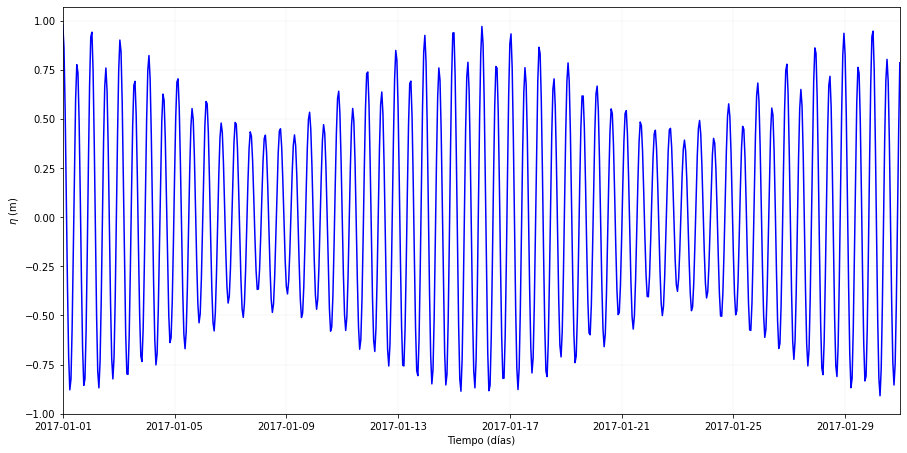

In [ ]:
alto  = 7.5
ancho = 15
fig = plt.figure(figsize=(ancho, alto))

#plt.plot(t/24,eta,'b')
plt.plot(time,eta,'b')
#plt.xlim(0,30)
plt.xlim(time[0],time[-1])
plt.xlabel('Tiempo (días)')
plt.ylabel('$\eta$ (m)')
plt.grid(color='lightgray', linestyle='--', linewidth=0.25)
plt.show()

Ajustamos la serie de tiempo, al modelo armónico de cosntituyentes astronómicas dado por T_Tide. Para más información acerca de los argumentos de esta y otras funciones lea el siguiente [artículo](https://www.sciencedirect.com/science/article/pii/S0098300402000134). 

In [ ]:
tide_fit = t_tide(eta,dt=dt,stime=time[0],synth=0)#, stime=t[0])

-----------------------------------
nobs = 720 
ngood = 719 
record length (days) = 30.00
start time: 2017-01-01 00:00:00
rayleigh criterion = 1.0

Greenwich phase computed, no nodal corrections
x0= 4.58e-05  xtrend= 0
var(data)= 0.25    var(prediction)= 0.25    var(residual)= 0.00
var(prediction)/var(data) (%) = 100.0

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
* MSF   0.0028219     0.0001     0.000     77.52     75.55      0.67
* 2Q1   0.0357064     0.0001     0.000     63.23     33.19       2.1
* Q1    0.0372185     0.0001     0.000    331.48     16.90        11
* O1    0.0387307     0.0191     0.000    276.38      0.09   4.3e+05
* NO1   0.0402686     0.0004     0.000     96.01      4.45   1.9e+02
* K1    0.0417807     0.0746     0.000      9.85      0.03   6.6e+06
* J1    0.0432929     0.0003     0.000    104.52      5.97        84
* OO1   0.0448308     0.0001     0.000    135.82     16.69        11
* U

La tabla anterior es el output de la información entregada por T_Tide.

Ahora podemos checkear visualmente si la serie de tiempo ajustada coincide con nuestra serie sintética:

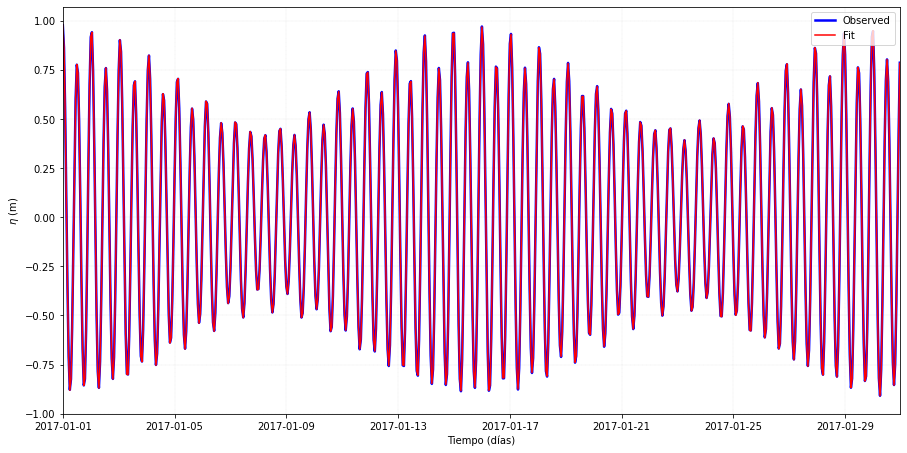

In [ ]:
#eta_fit = tide_fit(np.array(time).astype('datetime64'))
eta_fit = tide_fit['xout'].squeeze()

alto  = 7.5
ancho = 15
fig = plt.figure(figsize=(ancho, alto))

#plt.plot(t/24,eta,'b')
#plt.plot(t/24,eta_fit,'r')
plt.plot(time,eta,'b',linewidth=2.5,label='Observed')
plt.plot(time,eta_fit,'r',label='Fit')
plt.xlim(time[0],time[-1])
plt.xlabel('Tiempo (días)')
plt.ylabel('$\eta$ (m)')
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.25)
plt.show()

Además, a partir de la amplitud de los principales armónicos diurnos ($K_{1}$ y $O_{1}$) y semidirunos ($M_{2}$ y $S_{2}$) es posible calcular un parámetro denominado **factor de forma** ($F$) que define que tipo de componentes dominan la marea:

$$F = \frac{a_{K_{1}} + a_{O_{1}}}{a_{M_{2}} + a_{S_{2}}}$$

En función del valor del factor de forma F, la marea astronómica suele clasificarse en: 

* marea de tipo semidiurna ($F\leq 0.25$) 
* marea de tipo mixto con predominio semidiurno ($0.25 < F < 1.5$),
* marea de tipo mixto con predominio diurno ($1.5<F<3$) 
* marea de tipo diurna ($F>3$)

Para nuestra marea sintética:

In [ ]:
def tide_type(F):
  if F < 0.25:
    print('F =',np.round(F,2),'- Marea de tipo semidiurna')
  elif F >= 0.25 and F<=1.5:
    print('F =',np.round(F,2),'- Marea de tipo mixta con predominio semidiurno')
  elif F > 1.5 and F<=3.0:
    print('F =',np.round(F,2),'- Marea de tipo mixta con predominio diurno')
  elif F > 3.0:
    print('F =',np.round(F,2),'- Marea de tipo diurna')
  return


# componentes desde t_tide:
ind_K1 = np.squeeze(np.where(tide_fit['nameu'].astype(np.str)=='K1  '))
ind_O1 = np.squeeze(np.where(tide_fit['nameu'].astype(np.str)=='O1  '))
ind_M2 = np.squeeze(np.where(tide_fit['nameu'].astype(np.str)=='M2  '))
ind_S2 = np.squeeze(np.where(tide_fit['nameu'].astype(np.str)=='S2  '))


#np.shape(tide_fit['tidecon'])#4 cols = amp, amp_err, pha, pha_err
amp_K1 = tide_fit['tidecon'][ind_K1][0]
amp_O1 = tide_fit['tidecon'][ind_O1][0]
amp_M2 = tide_fit['tidecon'][ind_M2][0]
amp_S2 = tide_fit['tidecon'][ind_S2][0]  

#shape factor
F = (amp_K1 + amp_O1)/ (amp_M2 + amp_S2) 

tide_type(F)

F = 0.11 - Marea de tipo semidiurna


### Datos Mareográficos desde IOC Sea Level Monitoring

Function para descarga de datos:

In [ ]:
def tide_extract(code,timestart,days=30):#timestop):#,days):
  print('Please wait, connecting to the server... \n')
  #Function to extract tide gauge data in a station from IOC level Monitoring (http://www.ioc-sealevelmonitoring.org)
  #in automatic way (Web Scrapping).
  #arguments:
  #code      : station code (extracted from IOC webpage), example: 'coqu'
  #timestart : initial time (date, UTC) of the record, examples: '2010-02-27','27/02/2010','2010-02-27 06:30','27/02/2010 06:30'  
  #days      : number of days from timestart (default value = 30 days)
  #timestop  : final time (date, UTC) of the record, example: '2010-03-02' (no implemented yet)
  #Constraints: 30 days is the maximum length record allowed.
  #IOC site will only allow 30 days download at a time
  #If you want to add more records, use thsi function recurrsivelly and then concatenate.
  #Created by Marco Quiroz (mqquiroz@uc.cl), Phd Student, Pontificia Universidad Católica de Chile.
  #version 1.0
  import requests
  import numpy as np
  import datetime
  def try_parsing_date(text):
    for fmt in ('%Y-%m-%d','%Y-%m-%d %H:%M','%Y-%m-%d %H:%M:%S','%d/%m/%Y','%d/%m/%Y %H:%M','%d/%m/%Y %H:%M:%S'):
        try:
            return datetime.datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')
  timestart = try_parsing_date(timestart)
  timestop = timestart + datetime.timedelta(days=days)
  inputs = {'query':'data', 'format':'ascii', 'code':code, 'timestart':timestart, 'timestop':timestop}
  response = requests.get('http://www.ioc-sealevelmonitoring.org/service.php?', params=inputs, timeout=20)
  aux_file = open('aux.txt','w')
  aux_file.write(response.text)
  aux_file.close()
  raw_data = np.loadtxt('aux.txt',skiprows=1,dtype={'names': ('C1', 'C2', 'C3', 'C4'),'formats': ('float', 'U10', 'U8', 'S4')})
  sensor = raw_data['C4']
  Ntot = len(sensor)
  list_sensors = list(set(sensor))
  print('Select sensor: \n')
  for i in range(len(list_sensors)):
    print(str(i+1)+'. ', list_sensors[i].decode())
  selected = int(input())
  ind_sensor = np.where(sensor == list_sensors[selected-1])
  eta_tide  = raw_data['C1'][ind_sensor]
  date_a = raw_data['C2'][ind_sensor]
  date_b = raw_data['C3'][ind_sensor]
  date = np.char.add(date_a,' ')
  date = np.char.add(date,date_b)
  time = [datetime.datetime.strptime(date[i], "%Y-%m-%d %H:%M:%S") for i in range(len(date))]
  return time, eta_tide, list_sensors[selected-1].decode()

Ejemplo de adquisición de datos de marea:

Please wait, connecting to the server... 

Select sensor: 

1.  rad
2.  prs
2


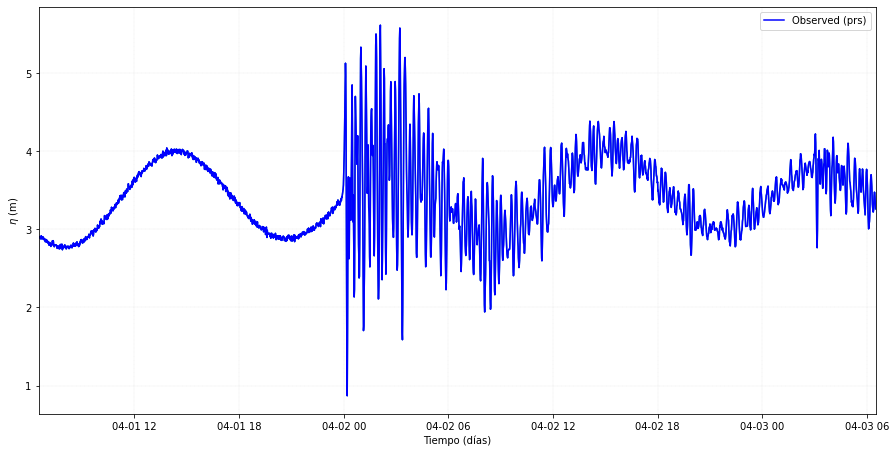

In [ ]:
#t, eta, sensor_name = tide_extract('valp','2015-09-13T12:29','2015-10-10T12:29')
#t, eta, sensor_name = tide_extract('valp','27/02/2010',1)
#t, eta, sensor_name = tide_extract('valp','20/02/2010',30)
t, eta, sensor_name = tide_extract('iqui','01/04/2014 06:30',2)

import matplotlib.pyplot as plt

alto  = 7.5
ancho = 15
fig = plt.figure(figsize=(ancho, alto))

plt.plot(t,eta)
plt.plot(t,eta,'b',label='Observed '+'('+sensor_name+')')
plt.xlim(t[0],t[-1])
plt.xlabel('Tiempo (días)')
plt.ylabel('$\eta$ (m)')
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.25)
plt.show()